In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import math

sns.set_context({"figure.figsize": (16, 9)}) 
sns.set(style="whitegrid", rc={"lines.linewidth": 4, "lines.markersize": 10})

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_excel("resultados.xls", sheet_name = "Resultados")
df = df[df["Batch"] == 50]
df.head()

,Modelo,Optimizacion,Tipo,Batch,Dropout,Learning Rate,Precision,Recall,F1
0,Modelo 1,Eficiencia,Tensorflow,50,0.1,0.001,94.85,93.53,94.19
2,Modelo 3,Eficiencia,Keras,50,0.1,0.001,95.53,92.87,94.19
4,Modelo 5,Eficiencia,Tensorflow,50,0.2,0.001,94.31,93.61,93.96
6,Modelo 7,Eficiencia,Keras,50,0.2,0.001,95.38,93.04,94.20
8,Modelo 9,Eficiencia,Tensorflow,50,0.3,0.001,95.79,91.24,93.46


## Gráficos de Métricas

In [3]:
df_e = df[df["Optimizacion"] == "Eficiencia"]
df_p = df[df["Optimizacion"] == "Precisión"]

In [4]:
df_p[df_p["Tipo"] == "Tensorflow"]

,Modelo,Optimizacion,Tipo,Batch,Dropout,Learning Rate,Precision,Recall,F1
24,Modelo 1,Precisión,Tensorflow,50,0.1,0.001,94.07,94.84,94.45
28,Modelo 5,Precisión,Tensorflow,50,0.2,0.001,93.37,89.93,91.61
32,Modelo 9,Precisión,Tensorflow,50,0.3,0.001,93.13,88.86,90.95
36,Modelo 13,Precisión,Tensorflow,50,0.1,0.010,80.94,73.71,77.15
40,Modelo 17,Precisión,Tensorflow,50,0.2,0.010,88.68,75.10,81.33
44,Modelo 21,Precisión,Tensorflow,50,0.3,0.010,84.94,72.07,77.98


In [5]:
custom_palette_e = {}

for index, row in df_e.iterrows():
    if row["Tipo"] == "Tensorflow":
        custom_palette_e[row["Modelo"]] = sns.color_palette("deep")[1]
    else:
        custom_palette_e[row["Modelo"]] = sns.color_palette("deep")[0]      

In [6]:
tf_list = df_p[df_p["Tipo"] == "Tensorflow"].Modelo.values
k_list = df_p[df_p["Tipo"] == "Keras"].Modelo.values
paleta_p = { modelo: sns.color_palette("deep")[1] for modelo in tf_list}
paleta_p.update({modelo: sns.color_palette("deep")[0] for modelo in k_list})

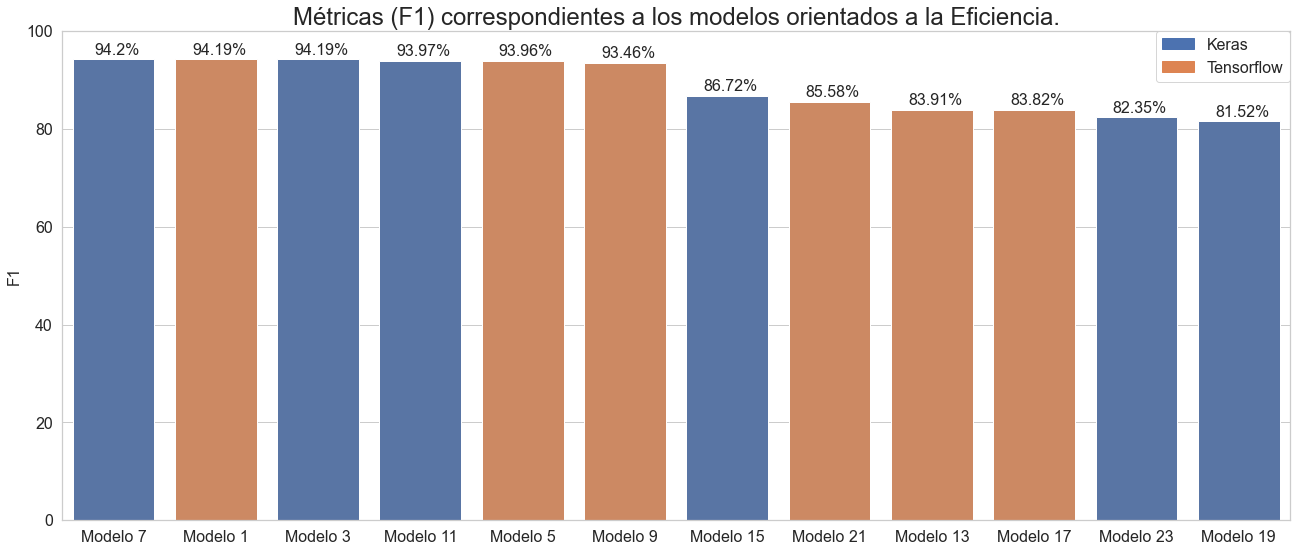

In [7]:
plt.figure(figsize = (22, 9))

datos = df_e.sort_values(by = ["F1"], ascending = False)

grafico = sns.barplot(x="Modelo", y="F1", data=datos, palette = custom_palette_e)

plt.xlabel('', fontsize = 16)

plt.ylabel('F1', fontsize = 16)
plt.title("Métricas (F1) correspondientes a los modelos orientados a la Eficiencia.", fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

keras_patch = mpatches.Patch(color= sns.color_palette("deep")[0], label='Keras')
tf_patch = mpatches.Patch(color= sns.color_palette("deep")[1], label='Tensorflow')

plt.legend(handles=[keras_patch, tf_patch], loc="best", borderaxespad=0., fontsize = 16)
plt.ylim([0, 100])


for spot in zip(grafico.axes.patches, datos.Modelo, datos.F1):
    altura = spot[0].get_height()
    grafico.axes.text(spot[0].get_x() + 0.432, altura + 1, f"{round(spot[2], 3)}%", fontsize = 16, horizontalalignment='center')

plt.show()

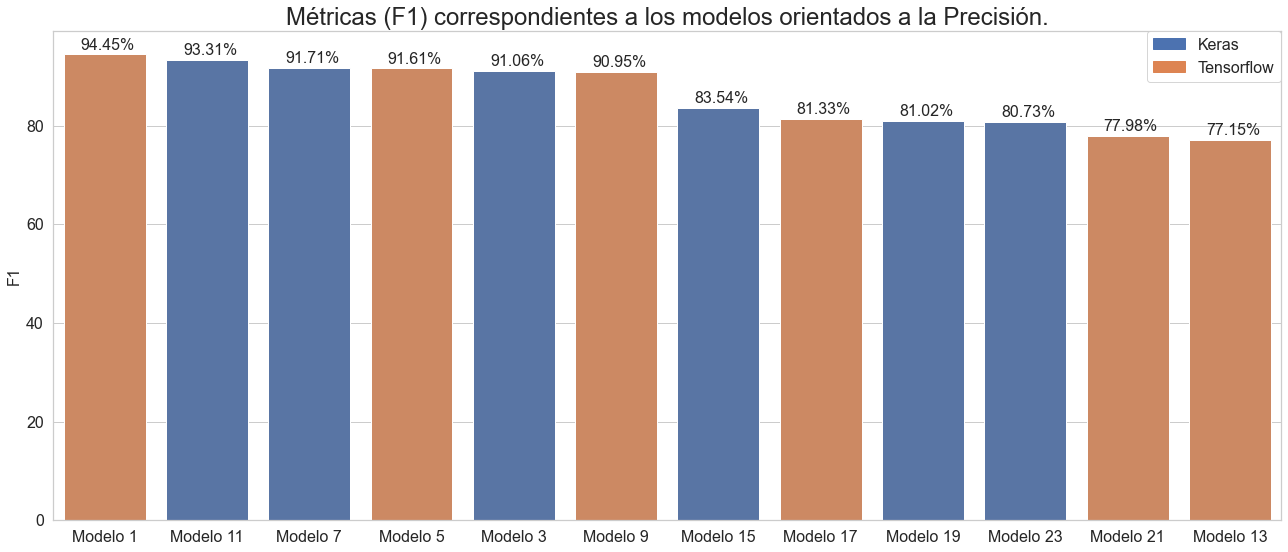

In [8]:
plt.figure(figsize = (22, 9))

datos = df_p.sort_values(by = ["F1"], ascending = False)

grafico = sns.barplot(x="Modelo", y="F1", data=datos, palette = paleta_p)

plt.xlabel('', fontsize = 16)

plt.ylabel('F1', fontsize = 16)
plt.title("Métricas (F1) correspondientes a los modelos orientados a la Precisión.", fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

keras_patch = mpatches.Patch(color= sns.color_palette("deep")[0], label='Keras')
tf_patch = mpatches.Patch(color= sns.color_palette("deep")[1], label='Tensorflow')

plt.legend(handles=[keras_patch, tf_patch], loc="best", borderaxespad=0., fontsize = 16)

for spot in zip(grafico.axes.patches, datos.Modelo, datos.F1):
    altura = spot[0].get_height()
    grafico.axes.text(spot[0].get_x() + 0.432, altura + 1, f"{round(spot[2], 3)}%", fontsize = 16, horizontalalignment='center')

plt.show()

### Comparativa Mejores Métricas

In [9]:
df_mejores = df_e.sort_values(by=["F1"], ascending = False).head(1).copy()
df_mejores = df_mejores.append(df_p.sort_values(by=["F1"], ascending = False).head(1).copy())
df_mejores = df_mejores.sort_values(by = ["F1"], ascending = False)
df_mejores.head()

,Modelo,Optimizacion,Tipo,Batch,Dropout,Learning Rate,Precision,Recall,F1
24,Modelo 1,Precisión,Tensorflow,50,0.1,0.001,94.07,94.84,94.45
6,Modelo 7,Eficiencia,Keras,50,0.2,0.001,95.38,93.04,94.20


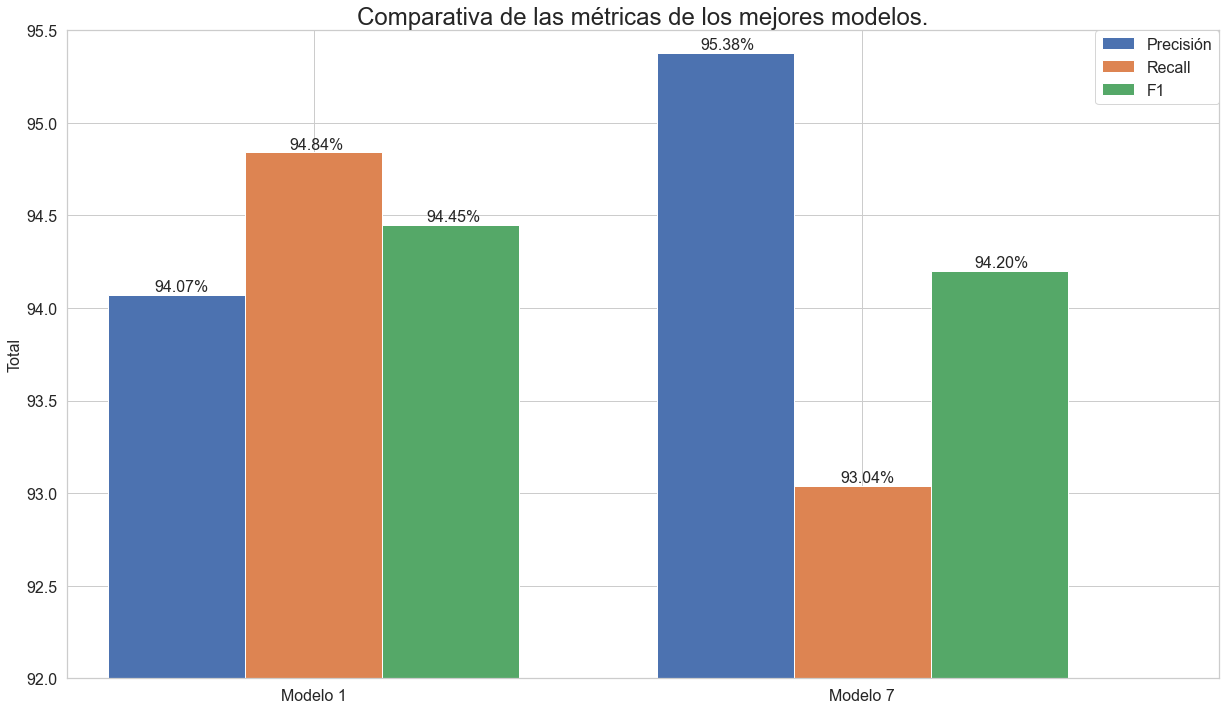

In [10]:
datos = [list(df_mejores.Precision.values), 
         list(df_mejores.Recall.values), 
         list(df_mejores.F1.values)]

X = np.arange(2)
fig = plt.figure(figsize = (16, 9))
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, datos[0], color = sns.color_palette("deep")[0], width = 0.25, label = "Precisión")
ax.bar(X + 0.25, datos[1], color = sns.color_palette("deep")[1], width = 0.25, label = "Recall")
ax.bar(X + 0.50, datos[2], color = sns.color_palette("deep")[2], width = 0.25, label = "F1")

plt.xticks([r + 0.25 for r in range(2)],
        ['Modelo 1', 'Modelo 7'])

plt.xlim([-0.2, 1.9])

plt.title("Comparativa de las métricas de los mejores modelos.", fontsize=24)

plt.ylabel('Total', fontsize = 16)

plt.legend(loc="best", borderaxespad=0., fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

low = 93.04
high = 95.38
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low)) - 1.5])


plt.text(x = -0.04 , y = datos[0][0] + 0.02, s=f"{datos[0][0]}%", fontdict=dict(fontsize=16))
plt.text(x = 0.205 , y = datos[1][0] + 0.02, s=f"{datos[1][0]}%", fontdict=dict(fontsize=16))
plt.text(x = 0.455 , y = datos[2][0] + 0.02, s=f"{datos[2][0]}%", fontdict=dict(fontsize=16))

plt.text(x = 0.955 , y = datos[0][1] + 0.02, s=f"{datos[0][1]}%", fontdict=dict(fontsize=16))
plt.text(x = 1.21 , y = datos[1][1] + 0.02, s=f"{datos[1][1]}%", fontdict=dict(fontsize=16))
plt.text(x = 1.455 , y = datos[2][1] + 0.02, s=f"{datos[2][1]}0%", fontdict=dict(fontsize=16))


plt.show()

## Gráficos de Rendimiento

In [11]:
df = pd.read_excel("resultados.xls", sheet_name='Rendimiento')
df.head(10)

,Documento,Leer PDF,Convertir PDF,Imagen a Texto,Paginas,Palabras,Entidades,NER,Reemplazos (Grafo),Reemplazos(Diccionario),Crear PDF,Exportar PDF,Total
0,Test1,0.054000,0.032000,9.557000,1,685,25,0.163000,0.09400,0.000000,0.035000,0.307000,10.242
1,Test2,0.863000,0.654000,17.880000,2,1246,50,0.186000,0.10800,0.000000,0.040000,0.347000,20.078
2,Test3,0.998000,1.004000,25.931000,3,1739,78,0.184000,0.09400,0.000000,0.037000,0.392000,28.640
3,Test4,2.810000,1.651000,46.323000,5,2998,159,0.250000,0.09500,0.001000,0.040000,0.496000,51.666
4,Test5,3.221000,2.199000,61.946000,7,3974,237,0.339000,0.09600,0.003000,0.048000,0.512000,68.364
5,Test6,5.780000,3.644000,98.564000,11,6597,636,0.514000,0.10900,0.014000,0.053000,0.514000,109.192
6,Test7,7.913000,4.793000,126.165000,15,8287,505,0.576000,0.18600,0.014000,0.055000,0.586000,140.288
7,MEDIA,5.050295,3.262072,90.173408,0,0,0,0.516256,0.18251,0.007468,0.071884,0.736108,61.210


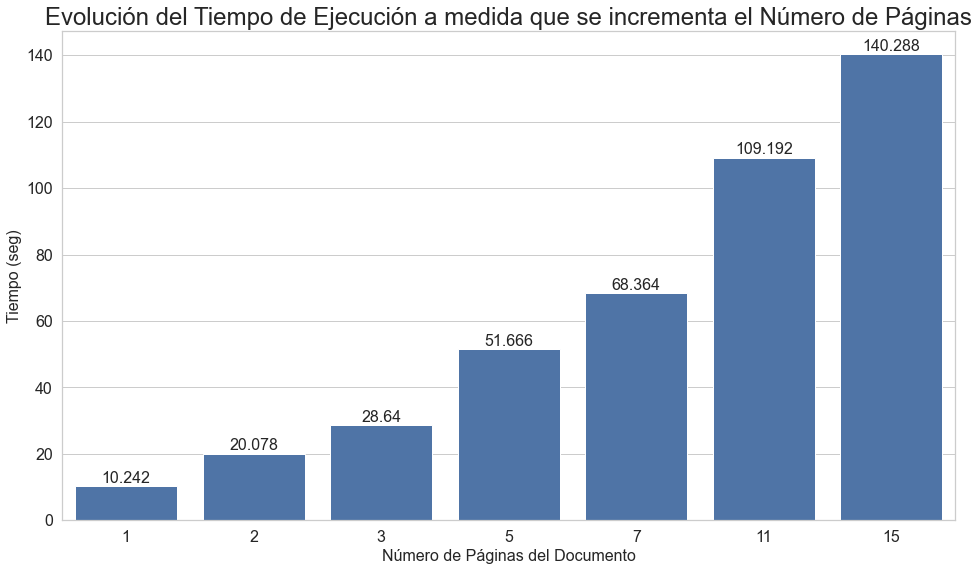

In [12]:
plt.figure(figsize = (16, 9))

datos = df.head(df.shape[0] - 1)

grafico = sns.barplot(x="Paginas", y="Total", data=datos, color = "#4072b5")

plt.xlabel('Número de Páginas del Documento', fontsize = 16)
plt.ylabel('Tiempo (seg)', fontsize = 16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Evolución del Tiempo de Ejecución a medida que se incrementa el Número de Páginas", fontsize=24)

for spot in zip(grafico.axes.patches, datos.Paginas, datos.Total):
    altura = spot[0].get_height()
    grafico.axes.text(spot[0].get_x() + 0.4, altura + 1, f"{round(spot[2], 3)}", fontsize = 16, horizontalalignment='center')

plt.show()

In [13]:
data2 = []
for index, row in df.iterrows():
    if row["Documento"] != "MEDIA":
        data2.append( {"Entidades": row["Entidades"], "Tiempo": row["NER"], "Etapa": "NER"} )

        data2.append( {"Entidades": row["Entidades"], "Tiempo": row["Reemplazos (Grafo)"], "Etapa": "Grafos (Optimizado)"} )

        data2.append( {"Entidades": row["Entidades"], "Tiempo": row["Reemplazos(Diccionario)"], "Etapa": "Diccionario"} )    

df3 = pd.DataFrame(data2)
df3 = df3.sort_values(by = ["Tiempo"])
df3.head()

,Entidades,Tiempo,Etapa
2,25,0.000,Diccionario
5,50,0.000,Diccionario
8,78,0.000,Diccionario
11,159,0.001,Diccionario
14,237,0.003,Diccionario


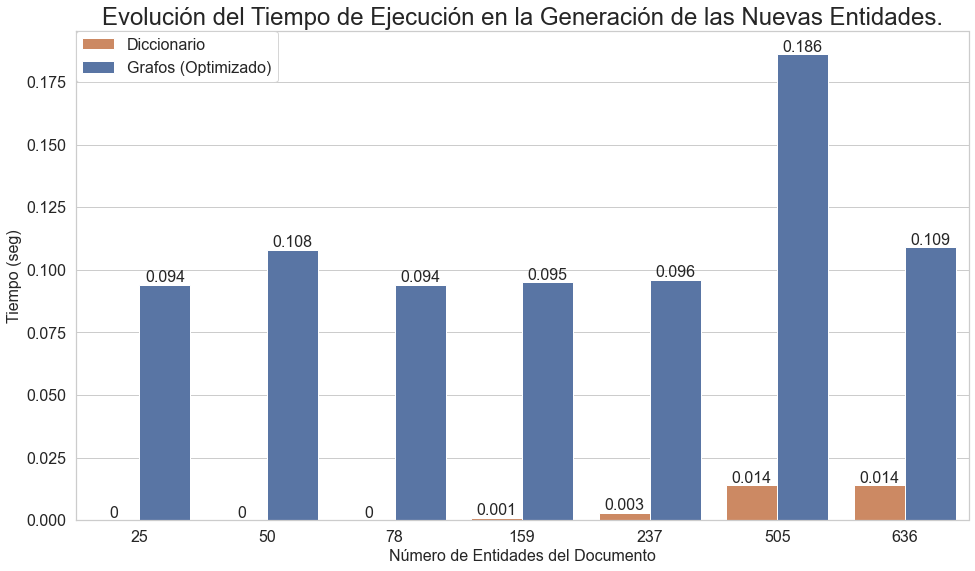

In [14]:
plt.figure(figsize = (16, 9))

datos = df3[df3["Etapa"] != "NER"]

grafico = sns.barplot(x="Entidades", y="Tiempo", data=datos, hue = "Etapa", palette = reversed(sns.color_palette("deep")[:2]))

plt.xlabel('Número de Entidades del Documento', fontsize = 16)

plt.ylabel('Tiempo (seg)', fontsize = 16)
plt.title("Evolución del Tiempo de Ejecución en la Generación de las Nuevas Entidades.", fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc="best", borderaxespad=0., fontsize = 16)

tiempos = [0, 0, 0, 0.001, 0.003, 0.014, 0.014, 0.094, 0.108, 0.094, 0.095, 0.096, 0.186, 0.109]

for spot in zip(grafico.axes.patches, tiempos):
    altura = spot[0].get_height()
    grafico.axes.text(spot[0].get_x() + 0.2, altura + 0.001, f"{round(spot[1], 3)}", fontsize = 16, horizontalalignment='center')


plt.show()

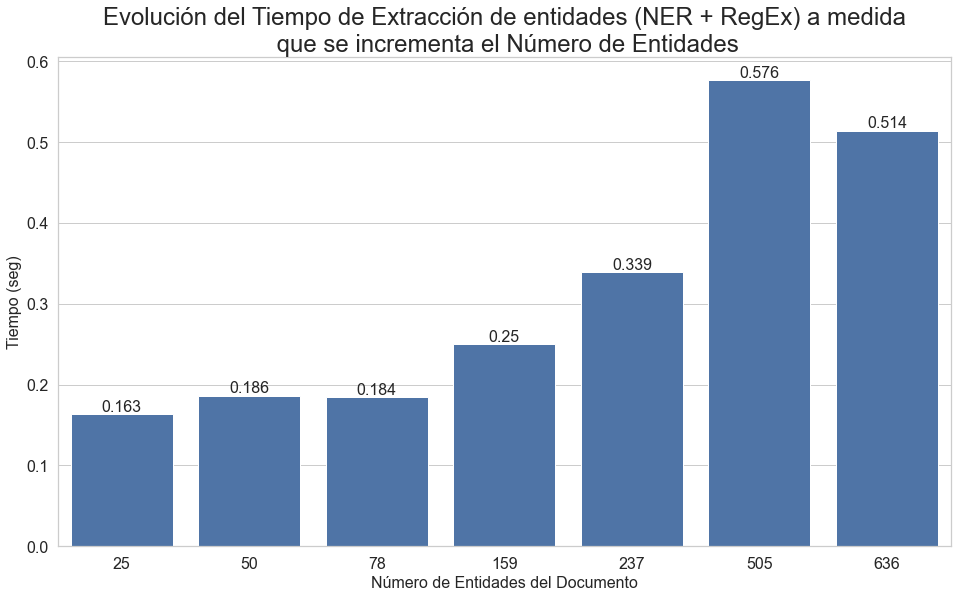

In [15]:
plt.figure(figsize = (16, 9))

datos = df.head(df.shape[0] - 1)

grafico = sns.barplot(x="Entidades", y="NER", data=datos, color = "#4072b5")

plt.xlabel('Número de Entidades del Documento', fontsize = 16)

plt.ylabel('Tiempo (seg)', fontsize = 16)
plt.title("Evolución del Tiempo de Extracción de entidades (NER + RegEx) a medida\n que se incrementa el Número de Entidades", fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

tiempos = [0.163, 0.186, 0.184, 0.25, 0.339, 0.576, 0.514]

for spot in zip(grafico.axes.patches, tiempos):
    altura = spot[0].get_height()
    grafico.axes.text(spot[0].get_x() + 0.4, altura + 0.004, f"{round(spot[1], 3)}", fontsize = 16, horizontalalignment='center')

plt.show()

In [16]:
etapas = df.tail(1).T.reset_index().iloc[1:12]
etapas.columns = ["Etapa", "% Tiempo"]
etapas = etapas[etapas["% Tiempo"] > 0]
etapas = etapas.sort_values(by = "% Tiempo", ascending = False)
etapas["Etapa"][2] = "PDF a Imagen"
etapas["Etapa"][7] = "NER + REGEX"
etapas

,Etapa,% Tiempo
3,Imagen a Texto,90.173408
1,Leer PDF,5.050295
2,PDF a Imagen,3.262072
11,Exportar PDF,0.736108
7,NER + REGEX,0.516256
8,Reemplazos (Grafo),0.18251
10,Crear PDF,0.071884
9,Reemplazos(Diccionario),0.007468


In [17]:
y = etapas["% Tiempo"].values
x = etapas["Etapa"].values

x2 = [f"{etapa} = {round(tiempo, 2)}%" for etapa, tiempo in zip(x,y)]

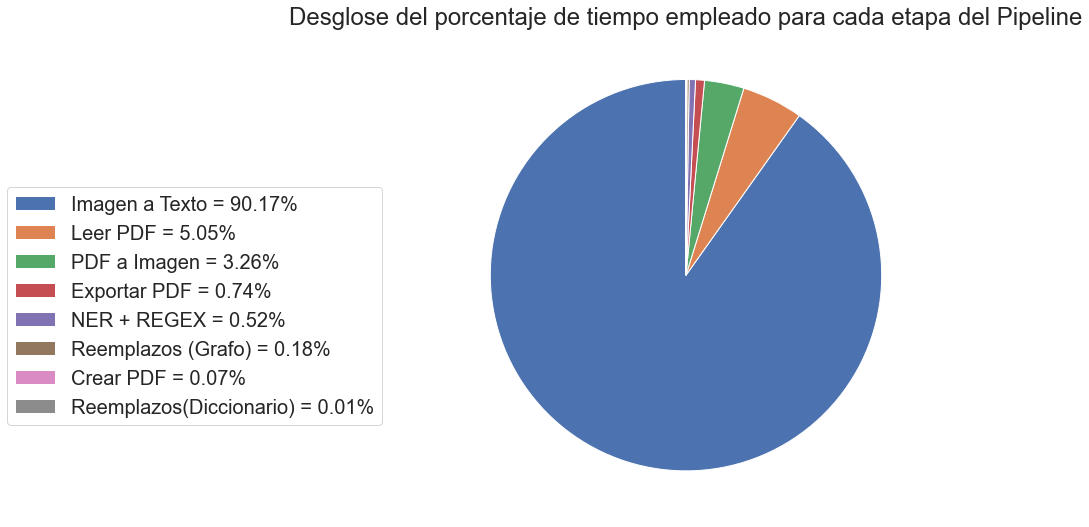

In [18]:
plt.figure(figsize = (16, 9))

patches, texts = plt.pie(y, startangle=90, radius=1, colors = sns.color_palette("deep"))
sort_legend = True

patches, x, dummy =  zip(*sorted(zip(patches, x, y),
                                      key=lambda x: x[2],
                                      reverse=True))

plt.legend(patches, x2, loc='best', bbox_to_anchor=(-0.1, .7), fontsize = 20)
plt.title("Desglose del porcentaje de tiempo empleado para cada etapa del Pipeline", fontsize=24)

plt.show()

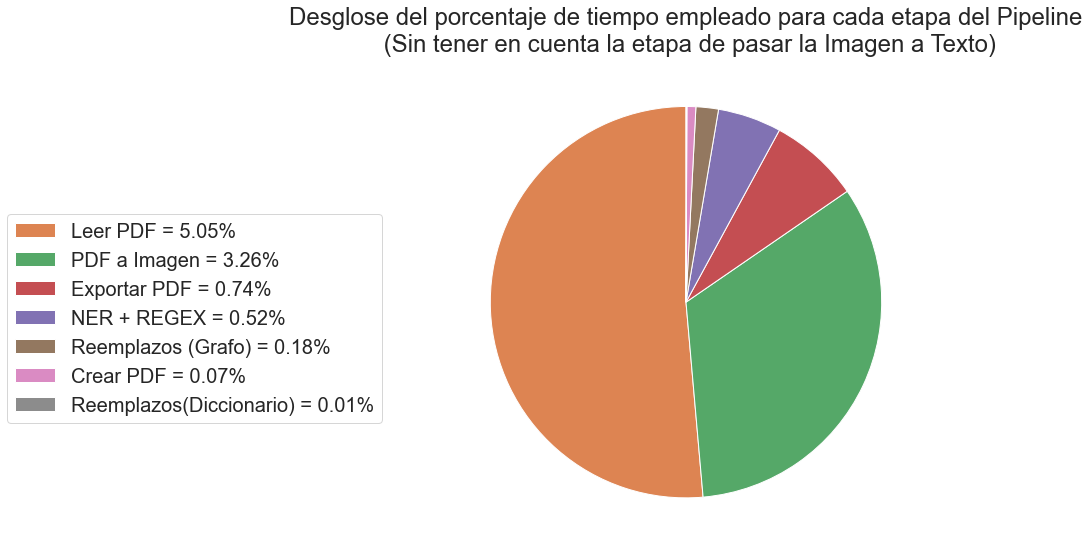

In [19]:
y = etapas["% Tiempo"].values
x = etapas["Etapa"].values
x2 = [f"{etapa} = {round(tiempo, 2)}%" for etapa, tiempo in zip(x,y)]

plt.figure(figsize = (16, 9))

patches, texts = plt.pie(y[1:], startangle=90, radius=1, colors = sns.color_palette("deep")[1:])

sort_legend = True

patches, x, dummy =  zip(*sorted(zip(patches, x[1:], y[1:]),
                                      key=lambda x: x[2],
                                      reverse=True))

plt.legend(patches, x2[1:], loc='best', bbox_to_anchor=(-0.1, .7), fontsize = 20)

plt.title("Desglose del porcentaje de tiempo empleado para cada etapa del Pipeline\n (Sin tener en cuenta la etapa de pasar la Imagen a Texto)", fontsize=24)

plt.show()